In [1]:
import wfdb
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pywt
import matplotlib.pyplot as plt

In [29]:
def remove_baseline_wander(ecg_signal, fs, cutoff=0.5):
    b, a = signal.butter(1, cutoff / (0.5 * fs), btype='highpass')
    return signal.filtfilt(b, a, ecg_signal)

def low_pass_filter(ecg_signal, fs, cutoff=40):
    b, a = signal.butter(4, cutoff / (0.5 * fs), btype='low')
    return signal.filtfilt(b, a, ecg_signal)

def notch_filter(ecg_signal, fs, notch_freq=50, quality_factor=30):
    b, a = signal.iirnotch(notch_freq / (0.5 * fs), quality_factor)
    return signal.filtfilt(b, a, ecg_signal)

def wavelet_denoising(ecg_signal, wavelet='db6', level=3):
    coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745  # Estimating noise level
    uthresh = sigma * np.sqrt(2 * np.log(len(ecg_signal)))
    denoised_coeffs = list(map(lambda x: pywt.threshold(x, uthresh, mode='soft'), coeffs))
    return pywt.waverec(denoised_coeffs, wavelet)


ecg_data = os.path.join(os.getcwd(), 'processed_ecg_signals_2/WFDBRecords')

mat_files = []

for root, dirs, files in os.walk(ecg_data):
    for file in files:
        if file.endswith('.mat'):
            mat_files.append(os.path.join(root, file))

for file in mat_files:
    try: 
        base_name = os.path.splitext(os.path.basename(file))[0]

        
        mat_path = os.path.join(os.path.dirname(file), base_name)

            
        x = wfdb.rdrecord(mat_path)
        fs = x.fs

        for i in range(0,12):
            y = x.p_signal[:,i]
            z = remove_baseline_wander(y, fs)
            a = low_pass_filter(z,fs)
            b = notch_filter(a,fs)
            c = wavelet_denoising(b)
            x.p_signal[:,i] = c

        var = x.p_signal.T #transpose
        output_path = os.path.join(os.path.dirname(file), base_name + '.mat')  # Save in original directory
        sio.savemat(output_path, {'my_matrix': var})  # Save the modified file
    except FileNotFoundError:
        print(f"File not found: {file}")
    except ValueError:
        print("value error")
    except IndexError:
        print(f"Index error processing file {file}. Check the signal dimensions.")





TypeError: wrann() got an unexpected keyword argument 'sig_name'

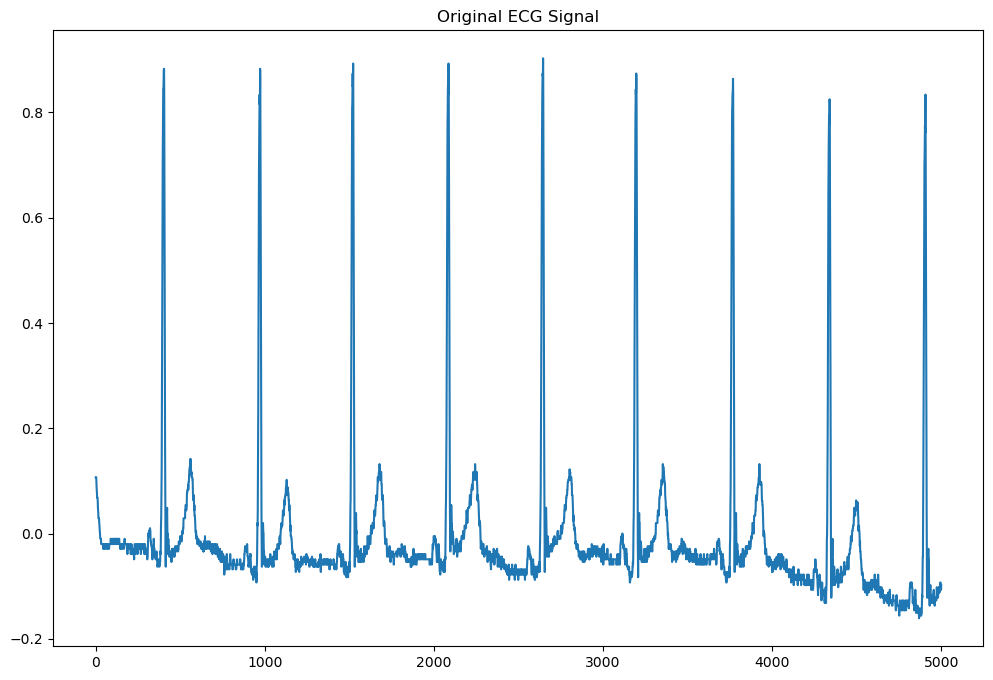

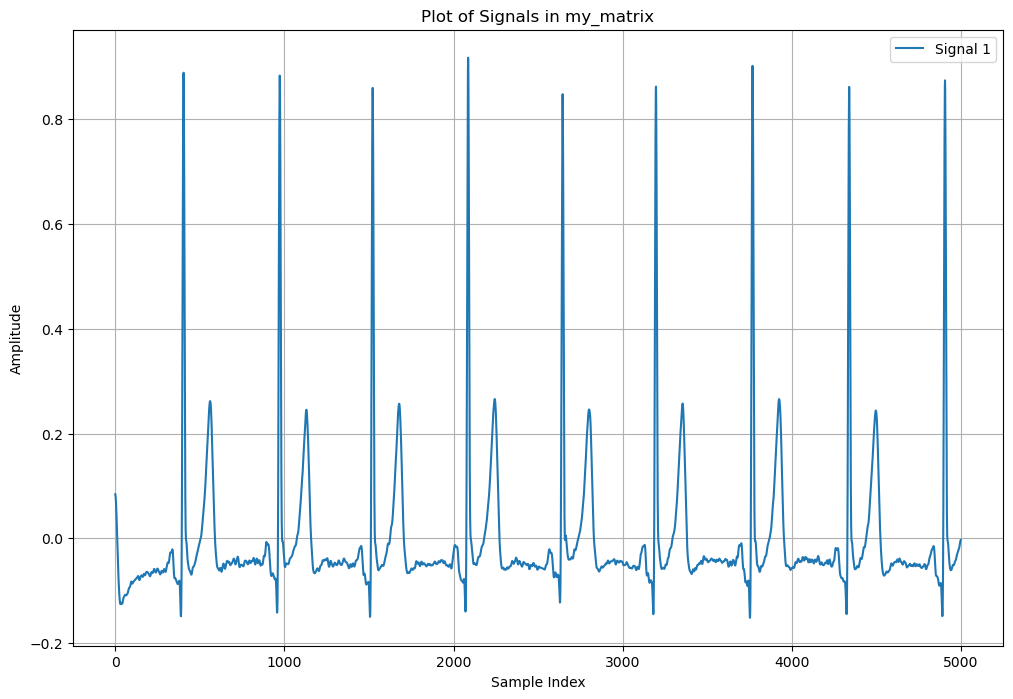

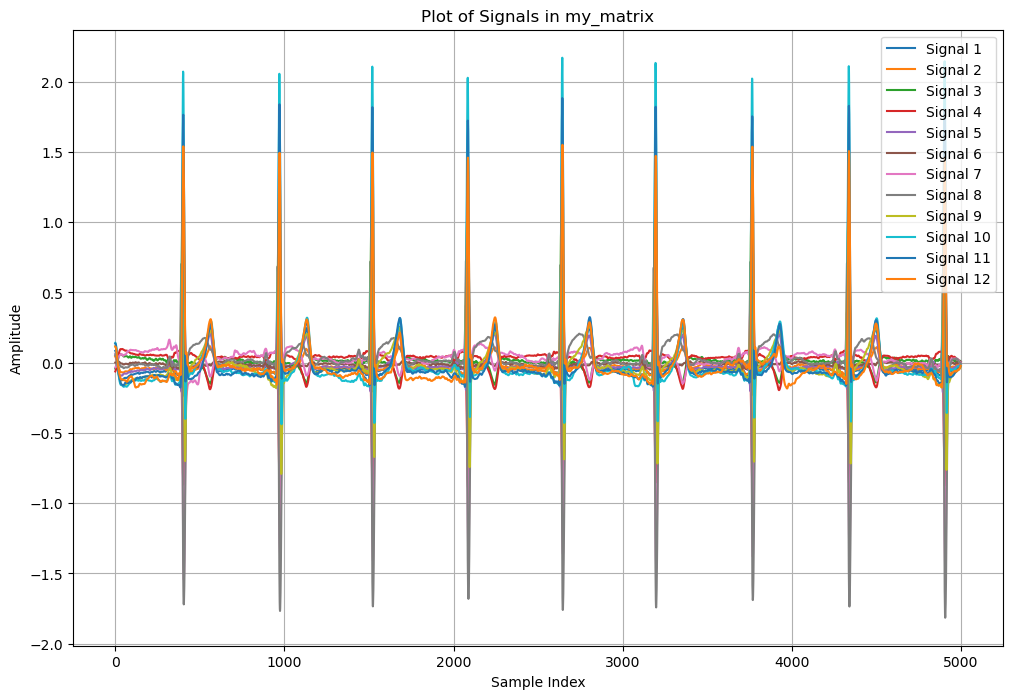

In [34]:
x = wfdb.rdrecord('/Users/matildacotton/Desktop/semester 2 2024/topics/code/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/01/010/JS00004')


plt.figure(figsize=(12, 8))
plt.title('Original ECG Signal')
plt.plot(x.p_signal[:,1])


file_path = '/Users/matildacotton/Desktop/semester 2 2024/topics/code/processed_ecg_signals_2/WFDBRecords/01/010/JS00004'  # Update with your actual file path
mat_data = sio.loadmat(file_path)

data_matrix = mat_data['my_matrix']

plt.figure(figsize=(12, 8))
for i in range(data_matrix.shape[0]):
    plt.plot(data_matrix[i, :], label=f'Signal {i+1}')

plt.title('Plot of Signals in my_matrix')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


file_path = '/Users/matildacotton/Desktop/semester 2 2024/topics/code/processed_ecg_signals_2/WFDBRecords/01/010/JS00004'  # Update with your actual file path
mat_data = sio.loadmat(file_path)

data_matrix = mat_data['my_matrix']

plt.figure(figsize=(12, 8))
for i in range(data_matrix.shape[0]):
    plt.plot(data_matrix[i, :], label=f'Signal {i+1}')

plt.title('Plot of Signals in my_matrix')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

